In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import anndata as ad

from lab_scripts.utils import utils
utils.change_directory_to_repo()

from lab_scripts.data.integration import atac
import importlib
importlib.reload(atac)

<module 'lab_scripts.data.integration.atac' from '/home/simon/nips/lab_scripts/data/integration/atac.py'>

In [19]:
data = ad.read_h5ad('data/official/predict_modality/openproblems_bmmc_multiome_phase1_mod2/openproblems_bmmc_multiome_phase1_mod2.censor_dataset.output_train_mod1.h5ad')
data

AnnData object with n_obs × n_vars = 16394 × 116490
    obs: 'batch'
    var: 'feature_types'
    uns: 'dataset_id'
    layers: 'counts'

In [30]:
genes = pd.read_csv('data/region_to_gene.csv', index_col=0)['gene_id']

In [31]:
region_to_gene = {}
for region, gene in genes.iteritems():
    region_to_gene[region] = gene
region_to_gene

{'chr1-778276-779191': 'ENSG00000237491',
 'chr1-822804-823597': 'ENSG00000228794',
 'chr1-827067-827948': 'ENSG00000228794',
 'chr1-838003-838737': 'ENSG00000228794',
 'chr1-841079-841916': 'ENSG00000228794',
 'chr1-842497-843414': 'ENSG00000228794',
 'chr1-844132-844995': 'ENSG00000228794',
 'chr1-857951-858596': 'ENSG00000228794',
 'chr1-865397-866322': 'ENSG00000228794',
 'chr1-958865-959755': 'ENSG00000188976',
 'chr1-960362-961092': 'ENSG00000188976',
 'chr1-998647-999397': 'ENSG00000187608',
 'chr1-999937-1000449': 'ENSG00000187608',
 'chr1-1000553-1001085': 'ENSG00000187608',
 'chr1-1001650-1002463': 'ENSG00000187608',
 'chr1-1004791-1005643': 'ENSG00000187608',
 'chr1-1008881-1009758': 'ENSG00000187608',
 'chr1-1013003-1013921': 'ENSG00000187608',
 'chr1-1098904-1099765': 'ENSG00000131591',
 'chr1-1103977-1104847': 'ENSG00000131591',
 'chr1-1115800-1116696': 'ENSG00000131591',
 'chr1-1216767-1217568': 'ENSG00000078808',
 'chr1-1219124-1219990': 'ENSG00000078808',
 'chr1-122179

In [33]:
total_genes = genes.unique()

In [34]:
gene_to_id = {}
for i, gene in enumerate(total_genes):
    gene_to_id[gene] = i

In [35]:
gene_activity = np.zeros((data.shape[0], total_genes.shape[0]))

In [36]:
for i, region in enumerate(data.var.index):
    if region in region_to_gene.keys():
        gene_id = gene_to_id[region_to_gene[region]]
        gene_activity[:, gene_id] += data.X[:, i].toarray().flatten()

In [37]:
gene_data = ad.read_h5ad('data/official/predict_modality/openproblems_bmmc_multiome_phase1_mod2/openproblems_bmmc_multiome_phase1_mod2.censor_dataset.output_train_mod2.h5ad')
gene_data

AnnData object with n_obs × n_vars = 16394 × 13431
    obs: 'batch'
    var: 'gene_ids', 'feature_types'
    uns: 'dataset_id'
    layers: 'counts'

In [38]:
gene_data.X.toarray()[0].argmax()

7400

In [40]:
gene_data.var.iloc[7400]

gene_ids         ENSG00000251562
feature_types                GEX
Name: MALAT1, dtype: object

In [41]:
gene_to_id['ENSG00000251562']

2015

In [42]:
gene_activity[0][2015]

1.0

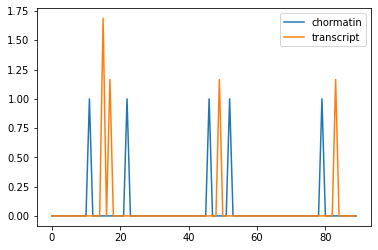

In [61]:
def plot(begin, end):
    
    names = gene_data.var.iloc[begin:end]['gene_ids']
    ga_idx = []
    true_idx = []
    for i, name in enumerate(names):
        if name in gene_to_id.keys():
            ga_idx.append(gene_to_id[name])
            true_idx.append(begin + i)
    true = gene_data.X.toarray()[0][true_idx]
    ga = gene_activity[0][ga_idx]
    x = np.arange(len(ga_idx))
    plt.plot(x, ga, label='chormatin')
    plt.plot(x, true, label='transcript')
    plt.legend()
plot(1300, 1400)

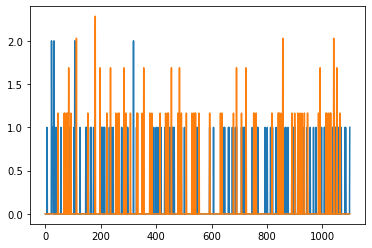